# 보스턴 집값 데이터 회귀분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [5]:
from data_utils import *

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ADsP/main/01%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A7%91%EA%B0%92%EB%8D%B0%EC%9D%B4%ED%84%B0.csv')

In [4]:
data.head()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   범죄율           506 non-null    float64
 1   25,000평방피트초과  506 non-null    float64
 2   비소매상업지역비율     506 non-null    float64
 3   찰스강경계         506 non-null    int64  
 4   농축 일산화질소      506 non-null    float64
 5   가구당평균방수       506 non-null    float64
 6   1940년이전건축비율   506 non-null    float64
 7   직업센터접근성       506 non-null    float64
 8   도로접근성         506 non-null    int64  
 9   재산세율          506 non-null    float64
 10  학생/교사비율       506 non-null    float64
 11  흑인비율          506 non-null    float64
 12  하위계층비율        506 non-null    float64
 13  주택가격          506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


🧼 [결측치 비율 확인]


📊 [숫자형 변수 이상값 리포트]

📌 범죄율
 - Median: 0.26
 - Max: 88.98 / Min: 0.01
 - Mean ± 3*Std: [-22.19, 29.42]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 8건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [-5.31, 9.07]
 - IQR 기준 이상값: 66건
   → 🚨 이상값 의심됨 (IQR 기준)



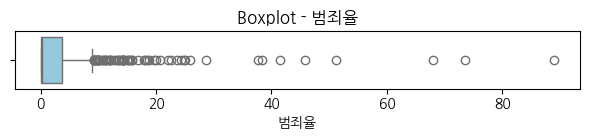

📌 25,000평방피트초과
 - Median: 0.00
 - Max: 100.00 / Min: 0.00
 - Mean ± 3*Std: [-58.60, 81.33]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 14건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [-18.75, 31.25]
 - IQR 기준 이상값: 68건
   → 🚨 이상값 의심됨 (IQR 기준)



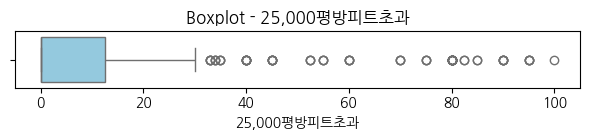

📌 비소매상업지역비율
 - Median: 9.69
 - Max: 27.74 / Min: 0.46
 - Mean ± 3*Std: [-9.44, 31.72]
   → ✅ 정상 범위 내
 - Z-score > 3: 0건
   → ✅ Z-score 이상 없음
 - IQR 범위: [-14.18, 37.47]
 - IQR 기준 이상값: 0건
   → ✅ IQR 기준 이상 없음



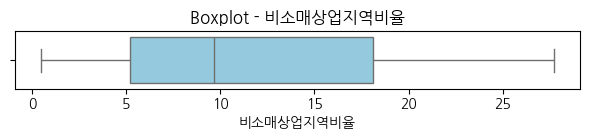

📌 찰스강경계
 - Median: 0.00
 - Max: 1.00 / Min: 0.00
 - Mean ± 3*Std: [-0.69, 0.83]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 35건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [0.00, 0.00]
 - IQR 기준 이상값: 35건
   → 🚨 이상값 의심됨 (IQR 기준)



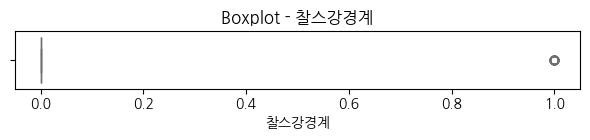

📌 농축 일산화질소
 - Median: 0.54
 - Max: 0.87 / Min: 0.39
 - Mean ± 3*Std: [0.21, 0.90]
   → ✅ 정상 범위 내
 - Z-score > 3: 0건
   → ✅ Z-score 이상 없음
 - IQR 범위: [0.19, 0.89]
 - IQR 기준 이상값: 0건
   → ✅ IQR 기준 이상 없음



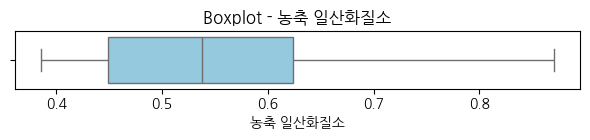

📌 가구당평균방수
 - Median: 6.21
 - Max: 8.78 / Min: 3.56
 - Mean ± 3*Std: [4.18, 8.39]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 8건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [4.78, 7.73]
 - IQR 기준 이상값: 30건
   → 🚨 이상값 의심됨 (IQR 기준)



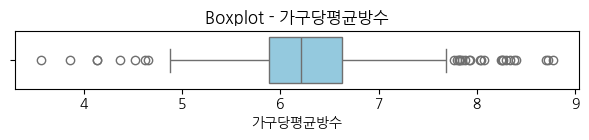

📌 1940년이전건축비율
 - Median: 77.50
 - Max: 100.00 / Min: 2.90
 - Mean ± 3*Std: [-15.87, 153.02]
   → ✅ 정상 범위 내
 - Z-score > 3: 0건
   → ✅ Z-score 이상 없음
 - IQR 범위: [-28.55, 167.65]
 - IQR 기준 이상값: 0건
   → ✅ IQR 기준 이상 없음



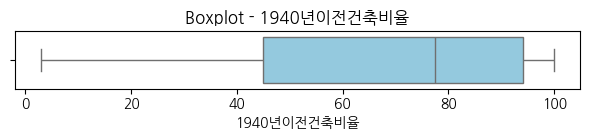

📌 직업센터접근성
 - Median: 3.21
 - Max: 12.13 / Min: 1.13
 - Mean ± 3*Std: [-2.52, 10.11]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 5건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [-2.53, 9.82]
 - IQR 기준 이상값: 5건
   → 🚨 이상값 의심됨 (IQR 기준)



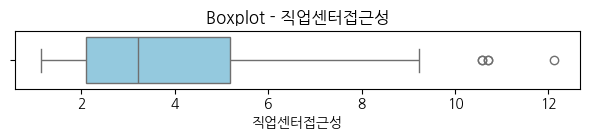

📌 도로접근성
 - Median: 5.00
 - Max: 24.00 / Min: 1.00
 - Mean ± 3*Std: [-16.57, 35.67]
   → ✅ 정상 범위 내
 - Z-score > 3: 0건
   → ✅ Z-score 이상 없음
 - IQR 범위: [-26.00, 54.00]
 - IQR 기준 이상값: 0건
   → ✅ IQR 기준 이상 없음



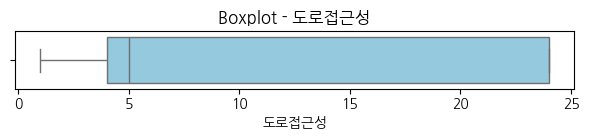

📌 재산세율
 - Median: 330.00
 - Max: 711.00 / Min: 187.00
 - Mean ± 3*Std: [-97.37, 913.85]
   → ✅ 정상 범위 내
 - Z-score > 3: 0건
   → ✅ Z-score 이상 없음
 - IQR 범위: [-301.50, 1246.50]
 - IQR 기준 이상값: 0건
   → ✅ IQR 기준 이상 없음



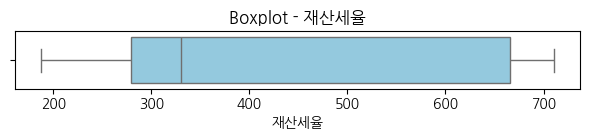

📌 학생/교사비율
 - Median: 19.05
 - Max: 22.00 / Min: 12.60
 - Mean ± 3*Std: [11.96, 24.95]
   → ✅ 정상 범위 내
 - Z-score > 3: 0건
   → ✅ Z-score 이상 없음
 - IQR 범위: [13.20, 24.40]
 - IQR 기준 이상값: 15건
   → 🚨 이상값 의심됨 (IQR 기준)



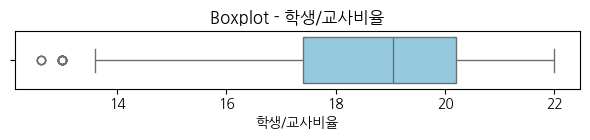

📌 흑인비율
 - Median: 391.44
 - Max: 396.90 / Min: 0.32
 - Mean ± 3*Std: [82.79, 630.56]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 25건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [344.11, 427.50]
 - IQR 기준 이상값: 77건
   → 🚨 이상값 의심됨 (IQR 기준)



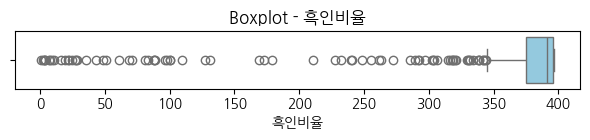

📌 하위계층비율
 - Median: 11.36
 - Max: 37.97 / Min: 1.73
 - Mean ± 3*Std: [-8.77, 34.08]
   → 🚨 이상값 의심됨 (3*표준편차 범위 초과)
 - Z-score > 3: 5건
   → 🚨 이상값 의심됨 (Z-score 기준)
 - IQR 범위: [-8.06, 31.96]
 - IQR 기준 이상값: 7건
   → 🚨 이상값 의심됨 (IQR 기준)



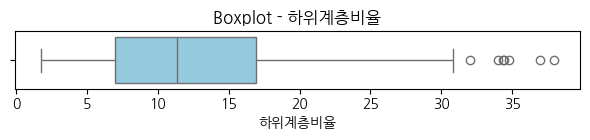

📌 주택가격
 - Median: 21.20
 - Max: 50.00 / Min: 5.00
 - Mean ± 3*Std: [-5.06, 50.12]
   → ✅ 정상 범위 내
 - Z-score > 3: 0건
   → ✅ Z-score 이상 없음
 - IQR 범위: [5.06, 36.96]
 - IQR 기준 이상값: 40건
   → 🚨 이상값 의심됨 (IQR 기준)



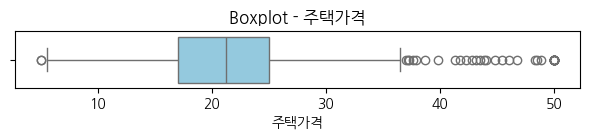


📦 [범주형 변수 희귀값 확인] (비율 < 1.0%)


In [6]:
detailed_outlier_report(data)

In [7]:
for col in data.columns:
    print('='*30,col,'='*30)
    print(data[col].value_counts())

============================== 범죄율 ==============================
범죄율
0.01501     2
14.33370    2
1.05393     1
0.78420     1
0.80271     1
           ..
0.04337     1
0.05360     1
0.04981     1
0.01360     1
0.62976     1
Name: count, Length: 504, dtype: int64
============================== 25,000평방피트초과 ==============================
25,000평방피트초과
0.0      372
20.0      21
80.0      15
22.0      10
25.0      10
12.5      10
40.0       7
30.0       6
45.0       6
90.0       5
33.0       4
21.0       4
95.0       4
60.0       4
75.0       3
28.0       3
52.5       3
55.0       3
34.0       3
70.0       3
35.0       3
85.0       2
82.5       2
17.5       1
18.0       1
100.0      1
Name: count, dtype: int64
============================== 비소매상업지역비율 ==============================
비소매상업지역비율
18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
2.25       1
2.01       1
4.15       1
1.89       1
2.02       1
Name: count, Length: 76, dtype: int64
======================

============================== 범죄율 ==============================


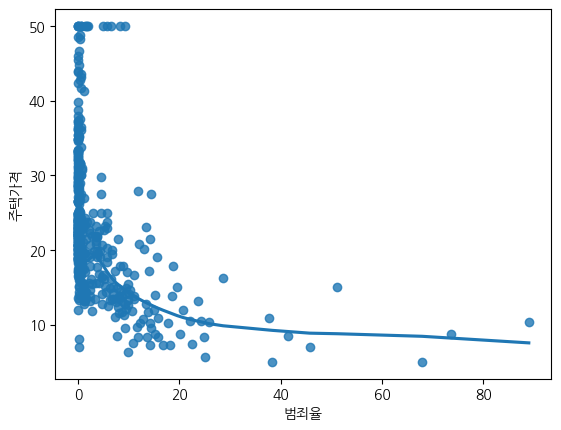

============================== 25,000평방피트초과 ==============================


C:\Users\Admin\miniforge3\envs\fintech\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


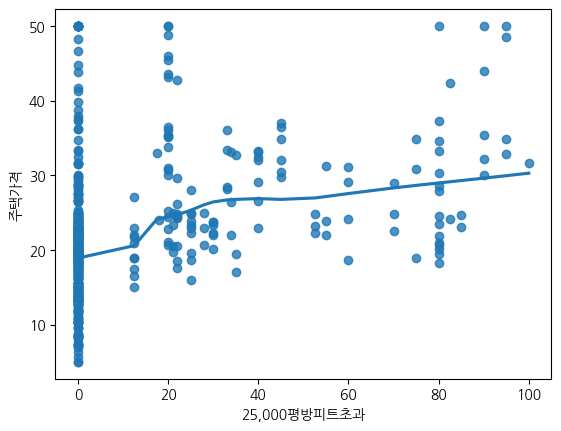

============================== 비소매상업지역비율 ==============================


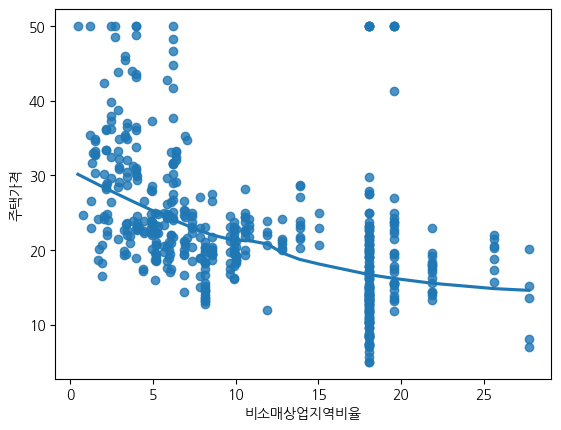

============================== 찰스강경계 ==============================


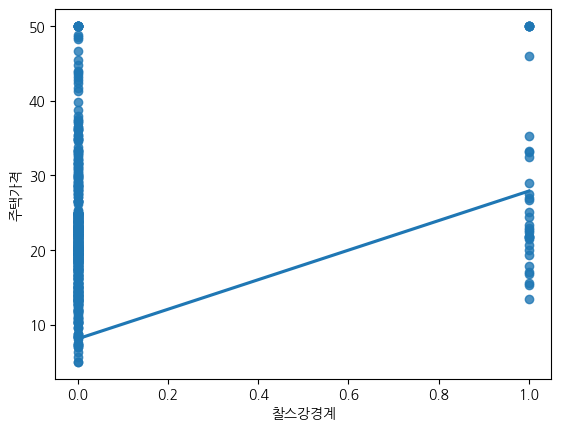

============================== 농축 일산화질소 ==============================


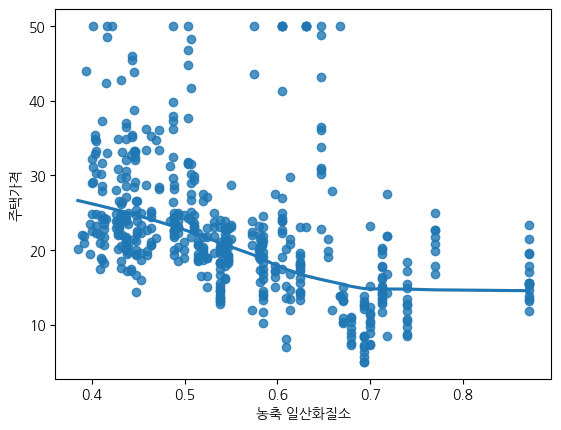

============================== 가구당평균방수 ==============================


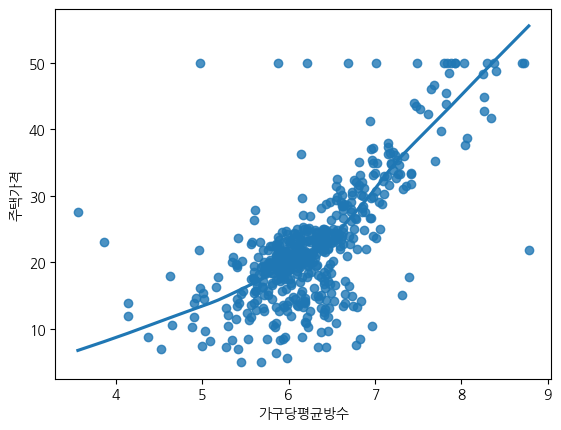

============================== 1940년이전건축비율 ==============================


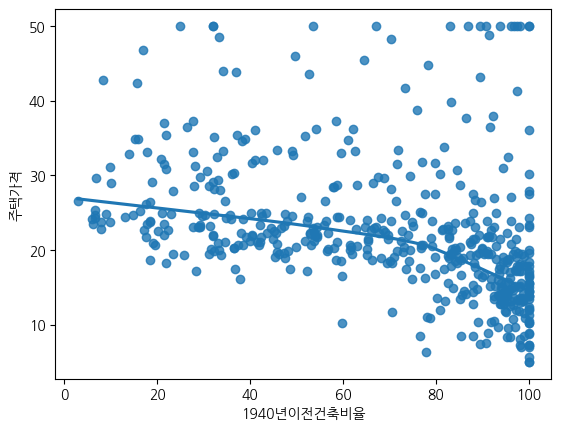

============================== 직업센터접근성 ==============================


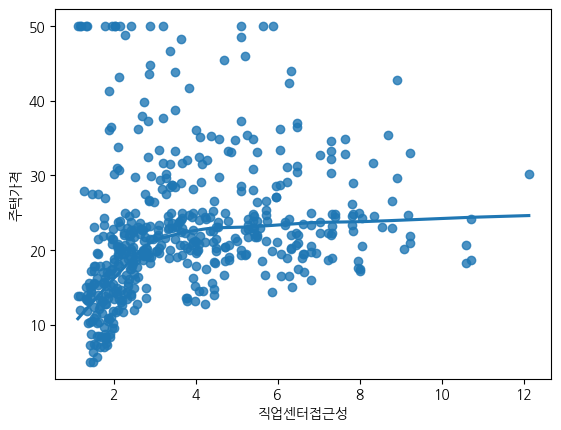

============================== 도로접근성 ==============================


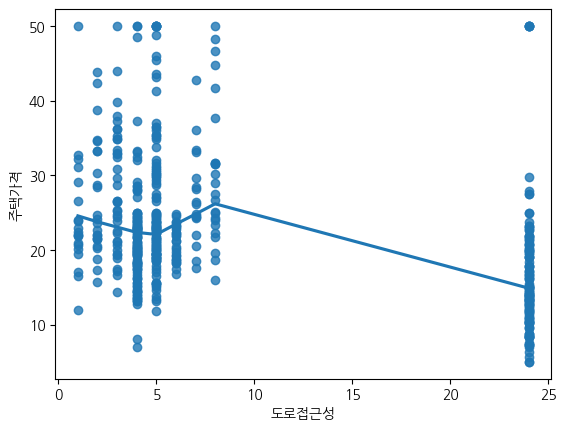

============================== 재산세율 ==============================


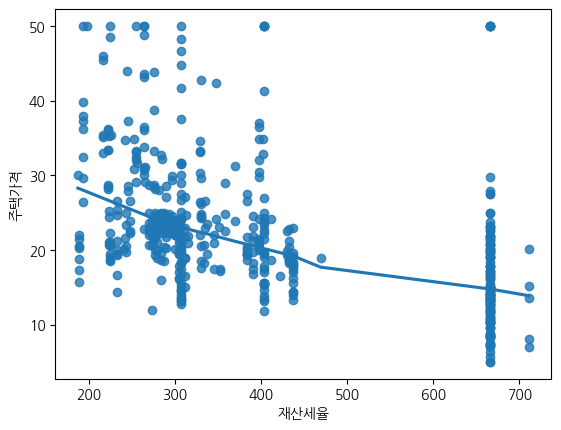

============================== 학생/교사비율 ==============================


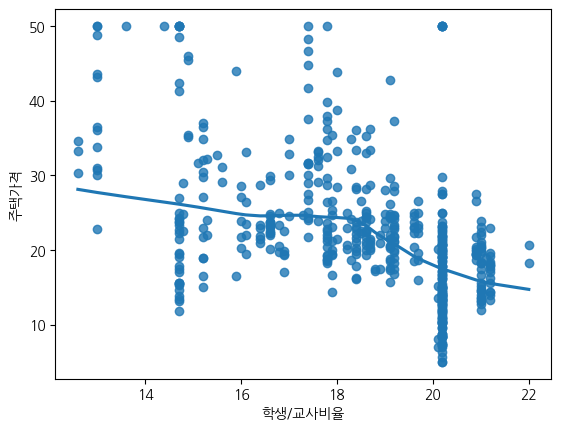

============================== 흑인비율 ==============================


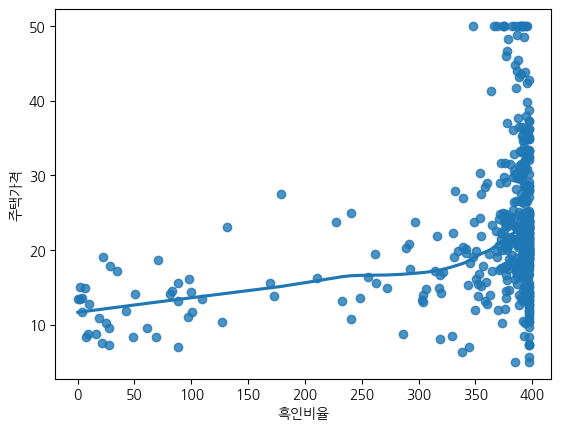

============================== 하위계층비율 ==============================


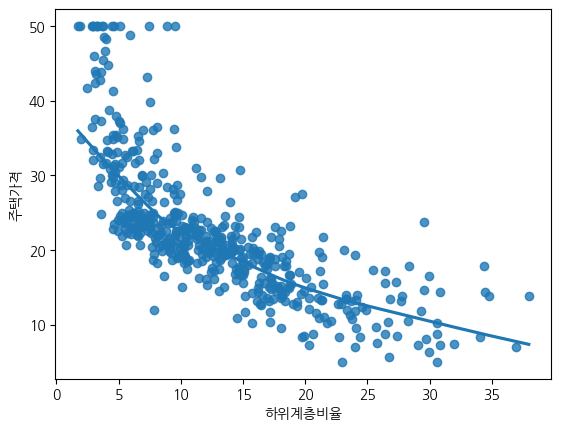

In [8]:
for col in data.columns[:-1]:
    print('='*30,col,'='*30)
    sns.regplot(data, x=col, y='주택가격',lowess=True)
    plt.show()

============================== 범죄율 ==============================


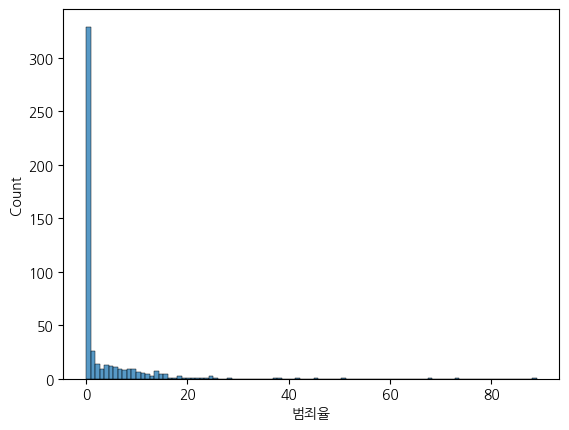

============================== 25,000평방피트초과 ==============================


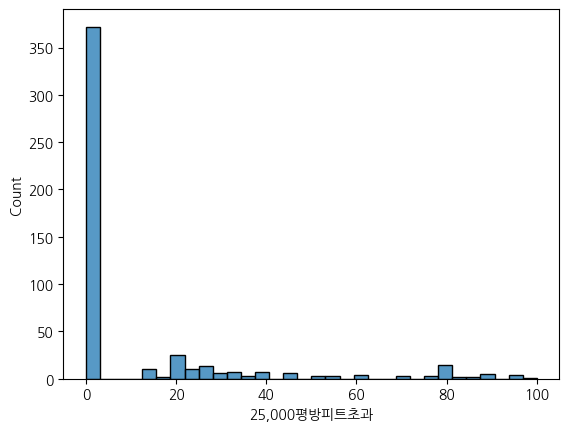

============================== 비소매상업지역비율 ==============================


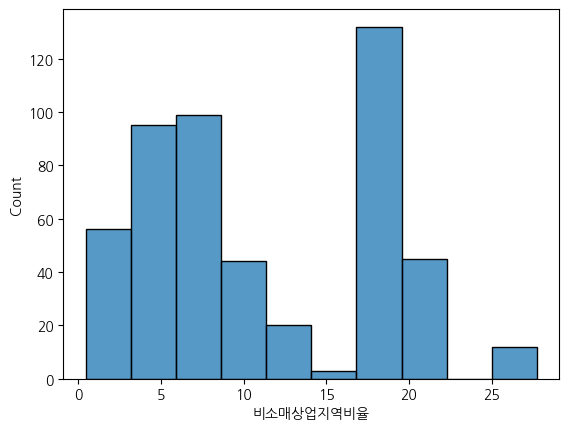

============================== 찰스강경계 ==============================


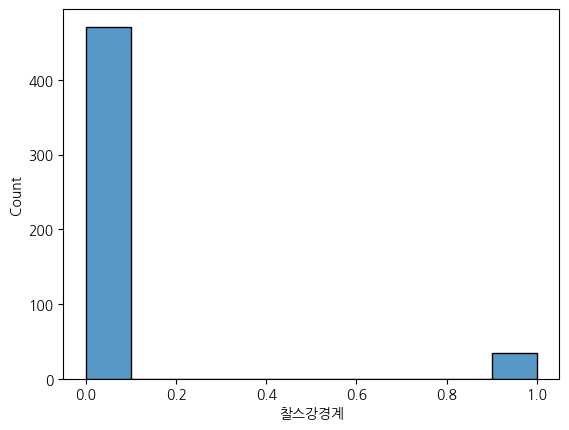

============================== 농축 일산화질소 ==============================


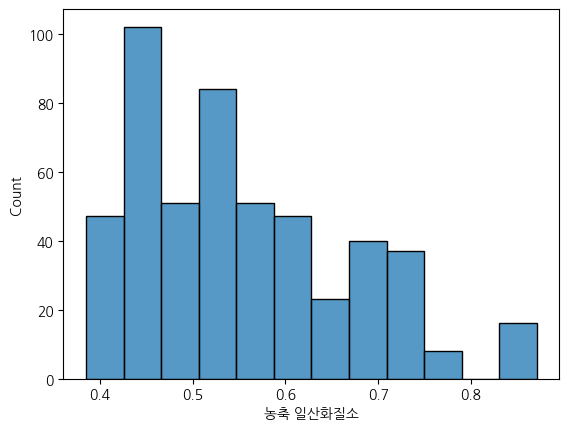

============================== 가구당평균방수 ==============================


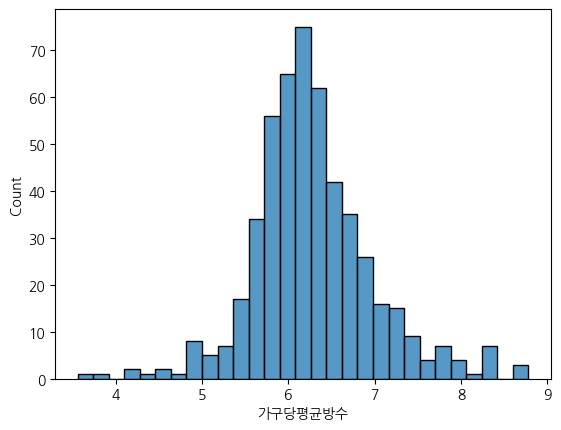

============================== 1940년이전건축비율 ==============================


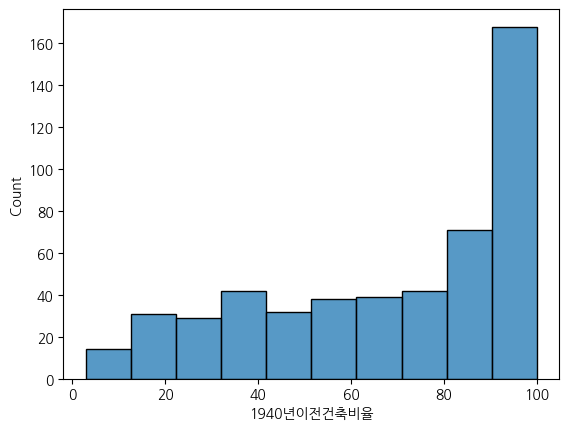

============================== 직업센터접근성 ==============================


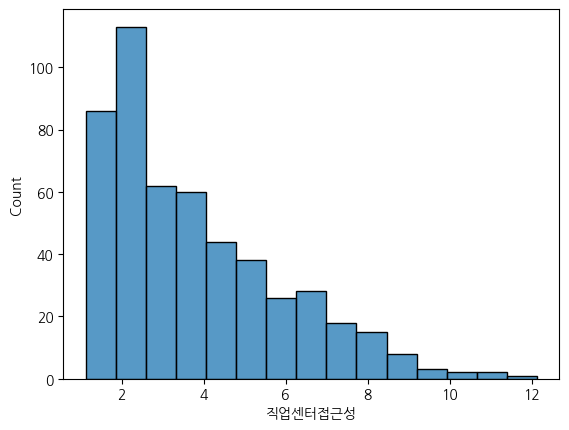

============================== 도로접근성 ==============================


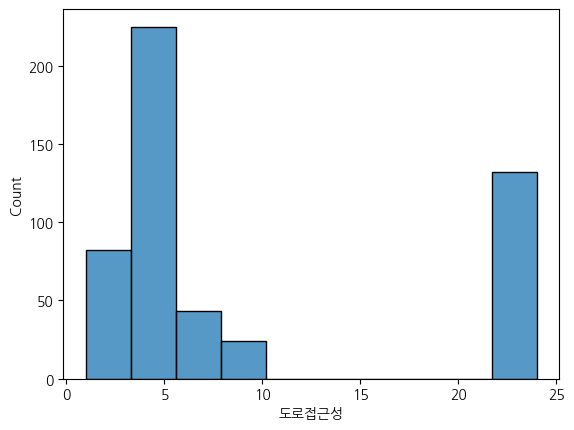

============================== 재산세율 ==============================


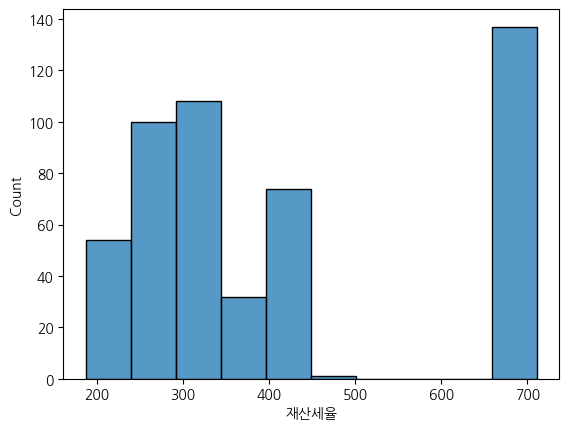

============================== 학생/교사비율 ==============================


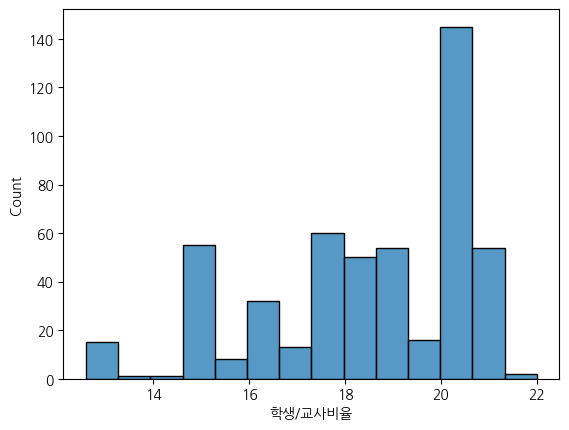

============================== 흑인비율 ==============================


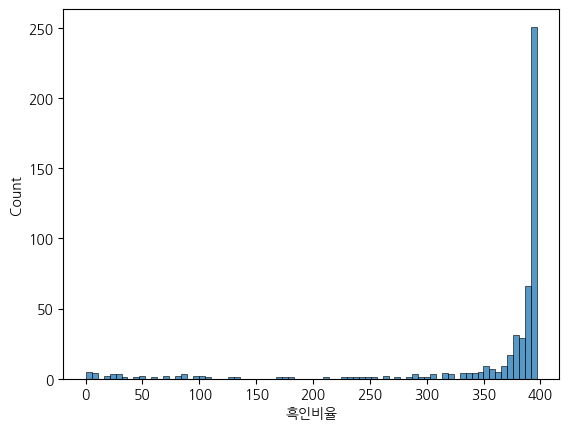

============================== 하위계층비율 ==============================


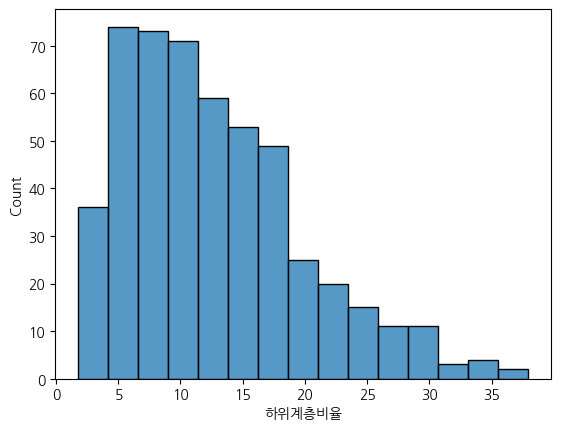

In [11]:
for col in data.columns[:-1]:
    print('='*30,col,'='*30)
    sns.histplot(data[col])
    plt.show()

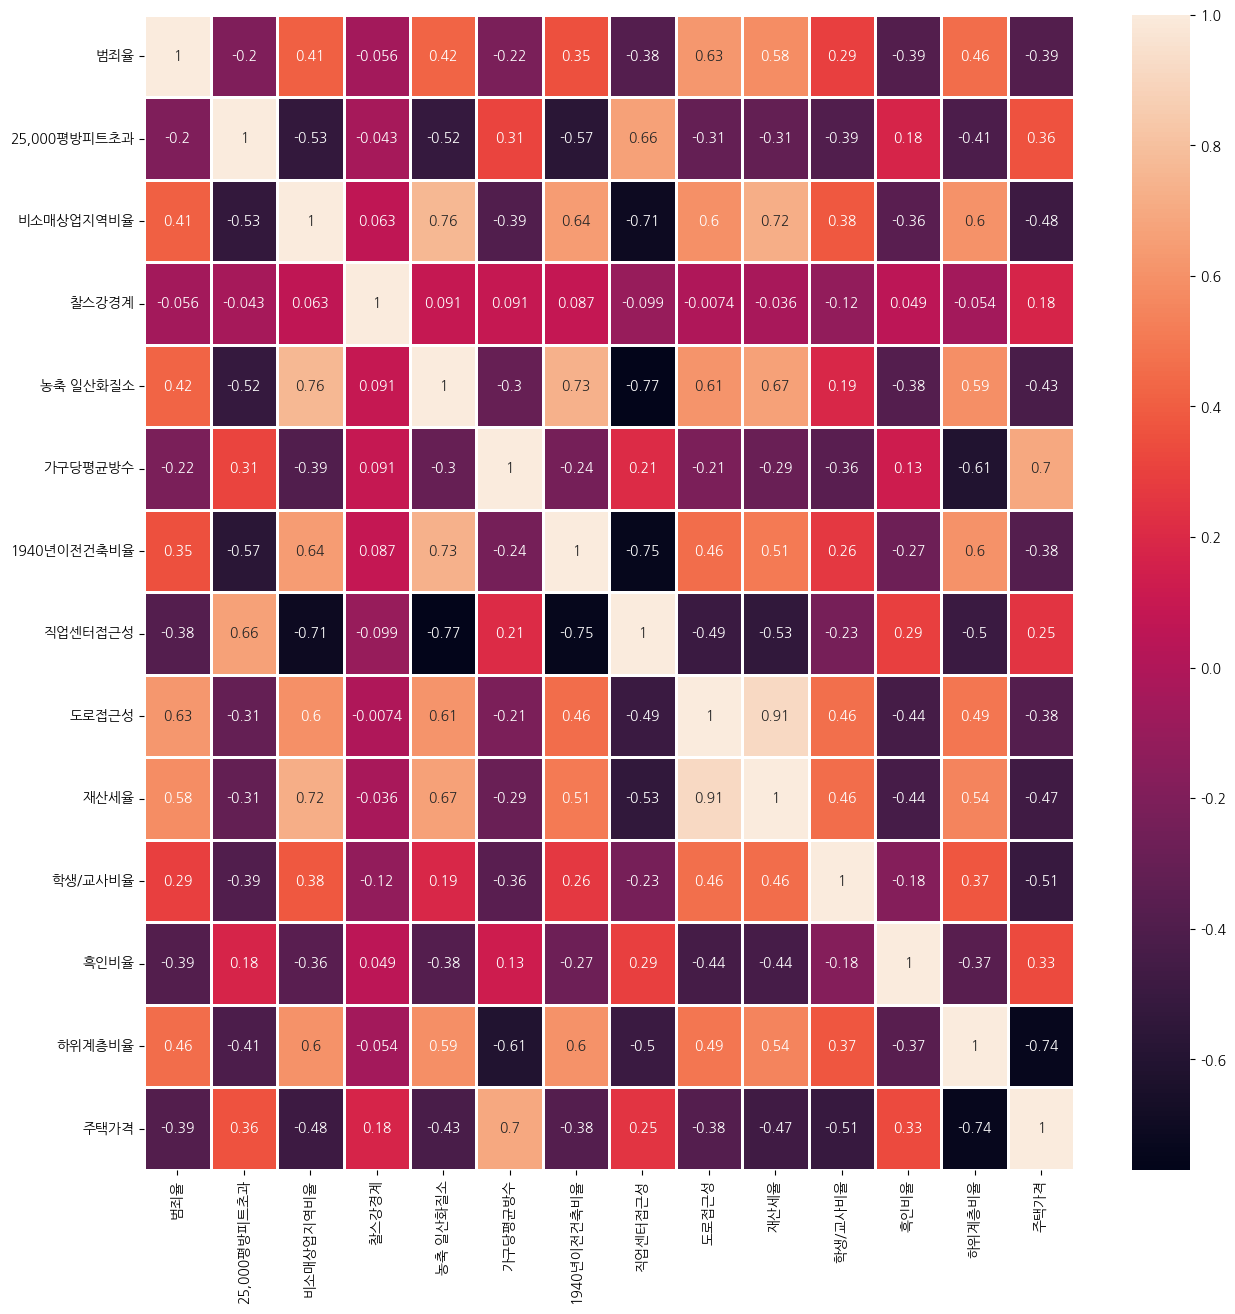

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, linewidths=1)
plt.show()

## 데이터

In [16]:
X = data.drop('주택가격', axis=1)
y = data['주택가격']

## 데이터 홀드아웃

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 데이터 스케일링(정규화)
* 모든 변수의 영향력을 공정하게 비교하기 위해서

In [36]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [21]:
ss = StandardScaler()
X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(ss.transform(X_test), columns=X_test.columns, index=X_test.index)

In [37]:
rs = RobustScaler()
X_train_scaled = pd.DataFrame(rs.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(rs.transform(X_test), columns=X_test.columns, index=X_test.index)

## 다중회귀분석

In [22]:
import statsmodels.api as sm

In [38]:
# 상수항추가
X_train_const = sm.add_constant(X_train_scaled)
X_test_const = sm.add_constant(X_test_scaled)

In [39]:
lr = sm.OLS(y_train, X_train_const).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     90.43
Date:                Thu, 08 May 2025   Prob (F-statistic):          6.21e-109
Time:                        14:23:04   Log-Likelihood:                -1194.3
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.7424      0.393     60.428   

* 비소매상업지역비율, 1940년이전건축비율, 25,000평방피트초과 삭제

In [26]:
from sklearn.metrics import mean_squared_error

In [40]:
pred = lr.predict(X_test_const)
print('mean_squared_error :', mean_squared_error(y_test, pred))
print('root_mean_squared_error :', np.sqrt(mean_squared_error(y_test, pred)))

mean_squared_error : 24.291119474973513
root_mean_squared_error : 4.928602182665336


In [41]:
X_train_const2 = X_train_const.drop(['비소매상업지역비율', '1940년이전건축비율', '25,000평방피트초과'], axis=1)
X_test_const2 = X_test_const.drop(['비소매상업지역비율', '1940년이전건축비율', '25,000평방피트초과'], axis=1)

In [42]:
lr = sm.OLS(y_train, X_train_const2).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     116.8
Date:                Thu, 08 May 2025   Prob (F-statistic):          3.85e-111
Time:                        14:23:23   Log-Likelihood:                -1196.4
No. Observations:                 404   AIC:                             2415.
Df Residuals:                     393   BIC:                             2459.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9590      0.349     68.649      0.0

In [43]:
pred2 = lr.predict(X_test_const2)
print('mean_squared_error :', mean_squared_error(y_test, pred2))
print('root_mean_squared_error :', np.sqrt(mean_squared_error(y_test, pred2)))

mean_squared_error : 25.500212598176393
root_mean_squared_error : 5.049773519493364


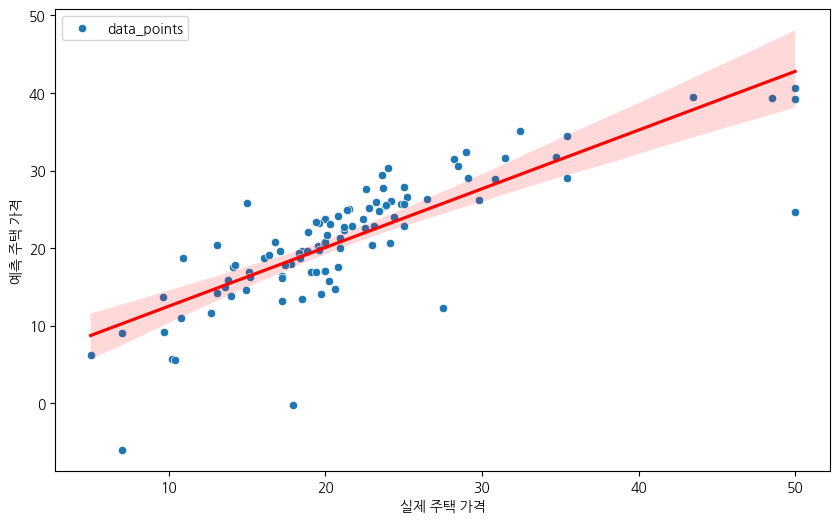

In [44]:
# 산점도와 회귀선 그리기
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y=pred2, label='data_points')
sns.regplot(x=y_test, y=pred2, scatter=False, label='regression line', color='red')
plt.xlabel('실제 주택 가격')
plt.ylabel('예측 주택 가격')
plt.show()

# 최적회귀 구하기(단계적 변수 선택법)
1) 전진선택법
2) 후진선택법

In [46]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [47]:
model = LinearRegression()

### 전진선택법으로 분석

In [51]:
sfs_fw = SequentialFeatureSelector(
        estimator=model, 
        direction='forward',
        scoring='r2',
        cv=5,
        n_jobs=2)
sfs_fw.fit(X_train_const, y_train)
print(sfs_fw.get_support())
selected_cols = X_train_const.columns[sfs_fw.get_support()]
print('전진선택법으로 선택된 컬럼 :', selected_cols)

[False False False False  True  True  True False  True False False  True
  True  True]
전진선택법으로 선택된 컬럼 : Index(['찰스강경계', '농축 일산화질소', '가구당평균방수', '직업센터접근성', '학생/교사비율', '흑인비율', '하위계층비율'], dtype='object')


## 정규화를 통한 선형회귀 변수 선택법
### 1) Lasso 회귀(L1규제)
* 가중치의 절대값의 합을 최소화
* 일부 가중치를 0으로 만들어서 변수를 무력화
* 변수를 선택하는 효과
* 불필요한 변수 제거
### 2) Ridge 회귀(L2규제)
* 가중치의 제곱합을 최소화
* 계수를 0에 가깝게 만들지만 제거는 하지 않음
* 다중공선성 해결에 효과적
### 3) Elastic Net(혼합규제/L1+L2)
* L1규제와 L2규제를 결합한 모델
* Lasso와 Ridge의 장점을 모두 활용
* 변수 간 상관관계가 높을 때 효과적
## 정규화 회귀를 사용하는 이유 : 과적합 방지 / 범용성 향상

# 라쏘(Lasso, L1제약, 절대값, 변수제외)

In [52]:
from sklearn.linear_model import Lasso

In [55]:
from sklearn.metrics import r2_score

In [56]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
pred = lasso.predict(X_test_scaled)
lasso_result = pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_)
display(lasso_result)
print('MSE :',mean_squared_error(y_test, pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

,0
범죄율,-0.316514
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,3.899789
1940년이전건축비율,-0.000000
직업센터접근성,-0.000000
도로접근성,-0.000000
재산세율,-0.000000


MSE : 32.38719208408524
RMSE : 5.690974616362758
R2 : 0.5583591806073869


In [57]:
for i in range(1, 11):
    lasso = Lasso(alpha=i)
    lasso.fit(X_train_scaled, y_train)
    pred = lasso.predict(X_test_scaled)
    lasso_result = pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_)
    print('='*30, i, '='*30)
    display(lasso_result)
    print('MSE :',mean_squared_error(y_test, pred))
    print('RMSE :',np.sqrt(mean_squared_error(y_test, pred)))
    print('R2 :', r2_score(y_test, pred))

============================== 1 ==============================


,0
범죄율,-0.316514
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,3.899789
1940년이전건축비율,-0.000000
직업센터접근성,-0.000000
도로접근성,-0.000000
재산세율,-0.000000


MSE : 32.38719208408524
RMSE : 5.690974616362758
R2 : 0.5583591806073869
============================== 2 ==============================


,0
범죄율,-0.409235
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,3.677085
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MSE : 38.07224985922285
RMSE : 6.170271457498677
R2 : 0.48083614101854033
============================== 3 ==============================


,0
범죄율,-0.448308
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,3.176363
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MSE : 44.67489779191717
RMSE : 6.683928320375464
R2 : 0.39080058512393234
============================== 4 ==============================


,0
범죄율,-0.404001
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,2.101030
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MSE : 49.643003919221826
RMSE : 7.045779156290795
R2 : 0.3230540989452043
============================== 5 ==============================


,0
범죄율,-0.359693
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,1.025697
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MSE : 56.73934202022865
RMSE : 7.532552158480461
R2 : 0.22628644568650436
============================== 6 ==============================


,0
범죄율,-0.312344
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.000000
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MSE : 65.55184553171452
RMSE : 8.096409422189229
R2 : 0.10611668037902122
============================== 7 ==============================


,0
범죄율,-0.202172
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.000000
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MSE : 66.97959450817982
RMSE : 8.184106213153628
R2 : 0.08664749557855966
============================== 8 ==============================


,0
범죄율,-0.092000
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.000000
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MSE : 68.62795462080753
RMSE : 8.2841990935037
R2 : 0.06416999555617509
============================== 9 ==============================


,0
범죄율,-0.000000
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.000000
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MSE : 70.27916096924234
RMSE : 8.383266724209742
R2 : 0.041653683465403324
============================== 10 ==============================


,0
범죄율,-0.000000
"25,000평방피트초과",0.000000
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.000000
가구당평균방수,0.000000
1940년이전건축비율,-0.000000
직업센터접근성,0.000000
도로접근성,-0.000000
재산세율,-0.000000


MSE : 70.97579964648007
RMSE : 8.424713624004086
R2 : 0.032154123409777635


# 릿지(Ridge, L2제약, 제곱합, 변수를 0에 가깝게 만들어 무력화)

In [58]:
from sklearn.linear_model import Ridge

In [59]:
ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
pred = ridge.predict(X_test_scaled)
ridge_result = pd.DataFrame(ridge.coef_, index=ridge.feature_names_in_)
display(ridge_result)
print('MSE :',mean_squared_error(y_test, pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

,0
범죄율,-0.350459
"25,000평방피트초과",0.562186
비소매상업지역비율,0.399324
찰스강경계,2.720437
농축 일산화질소,-2.974157
가구당평균방수,3.340857
1940년이전건축비율,-0.299001
직업센터접근성,-4.661667
도로접근성,1.927590
재산세율,-3.636555


MSE : 24.39367704371861
RMSE : 4.938995550080867
R2 : 0.6673609898129905


In [61]:
ridge = Ridge(alpha=30)
ridge.fit(X_train_scaled, y_train)
pred = ridge.predict(X_test_scaled)
ridge_result = pd.DataFrame(ridge.coef_, index=ridge.feature_names_in_)
display(ridge_result)
print('MSE :',mean_squared_error(y_test, pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

,0
범죄율,-0.334554
"25,000평방피트초과",0.253597
비소매상업지역비율,-0.278629
찰스강경계,1.538325
농축 일산화질소,-1.446165
가구당평균방수,3.644172
1940년이전건축비율,-0.254409
직업센터접근성,-2.665431
도로접근성,0.678055
재산세율,-0.924308


MSE : 26.225531196645974
RMSE : 5.121086915552788
R2 : 0.6423813136803336


# Elastic Net (Lasso와 Ridge를 동시에 사용, L1+L2)

In [62]:
from sklearn.linear_model import ElasticNet

In [64]:
el_net = ElasticNet(alpha=1, l1_ratio=0.5)
el_net.fit(X_train_scaled, y_train)
pred = el_net.predict(X_test_scaled)
el_net_result = pd.DataFrame(el_net.coef_, index=el_net.feature_names_in_)
display(el_net_result)
print('MSE :',mean_squared_error(y_test, pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

,0
범죄율,-0.443008
"25,000평방피트초과",0.138998
비소매상업지역비율,-0.000000
찰스강경계,0.000000
농축 일산화질소,-0.033190
가구당평균방수,2.972247
1940년이전건축비율,-0.000000
직업센터접근성,-0.000000
도로접근성,-0.000000
재산세율,-0.000000


MSE : 33.298116017245114
RMSE : 5.770451976859794
R2 : 0.5459375668039861


In [65]:
el_net = ElasticNet(alpha=1, l1_ratio=0.3)
el_net.fit(X_train_scaled, y_train)
pred = el_net.predict(X_test_scaled)
el_net_result = pd.DataFrame(el_net.coef_, index=el_net.feature_names_in_)
display(el_net_result)
print('MSE :',mean_squared_error(y_test, pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

,0
범죄율,-0.447503
"25,000평방피트초과",0.226532
비소매상업지역비율,-0.172613
찰스강경계,0.021456
농축 일산화질소,-0.206543
가구당평균방수,2.716833
1940년이전건축비율,-0.000000
직업센터접근성,-0.012776
도로접근성,-0.059715
재산세율,-0.040782


MSE : 33.35273833061145
RMSE : 5.7751829694487995
R2 : 0.5451927216451469


# LassoCV / RidgeCV / ElasticnetCV

In [66]:
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV

In [67]:
alphas = np.logspace(-4, 4, 100)
alphas

array([1.00000000e-04, 1.20450354e-04, 1.45082878e-04, 1.74752840e-04,
       2.10490414e-04, 2.53536449e-04, 3.05385551e-04, 3.67837977e-04,
       4.43062146e-04, 5.33669923e-04, 6.42807312e-04, 7.74263683e-04,
       9.32603347e-04, 1.12332403e-03, 1.35304777e-03, 1.62975083e-03,
       1.96304065e-03, 2.36448941e-03, 2.84803587e-03, 3.43046929e-03,
       4.13201240e-03, 4.97702356e-03, 5.99484250e-03, 7.22080902e-03,
       8.69749003e-03, 1.04761575e-02, 1.26185688e-02, 1.51991108e-02,
       1.83073828e-02, 2.20513074e-02, 2.65608778e-02, 3.19926714e-02,
       3.85352859e-02, 4.64158883e-02, 5.59081018e-02, 6.73415066e-02,
       8.11130831e-02, 9.77009957e-02, 1.17681195e-01, 1.41747416e-01,
       1.70735265e-01, 2.05651231e-01, 2.47707636e-01, 2.98364724e-01,
       3.59381366e-01, 4.32876128e-01, 5.21400829e-01, 6.28029144e-01,
       7.56463328e-01, 9.11162756e-01, 1.09749877e+00, 1.32194115e+00,
       1.59228279e+00, 1.91791026e+00, 2.31012970e+00, 2.78255940e+00,
      

In [68]:
lassoCV = LassoCV(alphas=alphas, cv=5, n_jobs=2, random_state=42)
lassoCV.fit(X_train_scaled, y_train)
print(lassoCV.alpha_)

0.0001


In [71]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_scaled, y_train)
pred = lasso.predict(X_test_scaled)
lasso_result = pd.DataFrame(lasso.coef_, index=lasso.feature_names_in_)
display(lasso_result)
print('MSE :',mean_squared_error(y_test, pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

,0
범죄율,-0.352341
"25,000평방피트초과",0.596571
비소매상업지역비율,0.494892
찰스강경계,2.774678
농축 일산화질소,-3.064554
가구당평균방수,3.313966
1940년이전건축비율,-0.295128
직업센터접근성,-4.781450
도로접근성,2.074888
재산세율,-4.049963


MSE : 24.298639456158313
RMSE : 4.929365015512476
R2 : 0.6686569489666664


In [76]:
ridgeCV = RidgeCV(alphas=alphas, cv=5)
ridgeCV.fit(X_train_scaled, y_train)
print(ridgeCV.alpha_)

0.298364724028334


In [77]:
ridge = Ridge(alpha=0.298364724028334)
ridge.fit(X_train_scaled, y_train)
pred = ridge.predict(X_test_scaled)
ridge_result = pd.DataFrame(ridge.coef_, index=ridge.feature_names_in_)
display(ridge_result)
print('MSE :',mean_squared_error(y_test, pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

,0
범죄율,-0.352132
"25,000평방피트초과",0.589412
비소매상업지역비율,0.483130
찰스강경계,2.765679
농축 일산화질소,-3.047364
가구당평균방수,3.321305
1940년이전건축비율,-0.301659
직업센터접근성,-4.755390
도로접근성,2.043952
재산세율,-3.962507


MSE : 24.32187920919131
RMSE : 4.931721728685765
R2 : 0.6683400451873783


In [79]:
ratios = np.linspace(0.1, 1, 10)
ratios

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [81]:
el_net_CV = ElasticNetCV(alphas=alphas, l1_ratio=ratios, cv=5, n_jobs=2, random_state=42)
el_net_CV.fit(X_train_scaled, y_train)
print(el_net_CV.alpha_, el_net_CV.l1_ratio_)

0.0001747528400007683 0.1


In [82]:
el_net = ElasticNet(alpha=0.0001747528400007683, l1_ratio=0.1)
el_net.fit(X_train_scaled, y_train)
pred = el_net.predict(X_test_scaled)
el_net_result = pd.DataFrame(el_net.coef_, index=el_net.feature_names_in_)
display(el_net_result)
print('MSE :',mean_squared_error(y_test, pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

,0
범죄율,-0.352728
"25,000평방피트초과",0.599318
비소매상업지역비율,0.514309
찰스강경계,2.780305
농축 일산화질소,-3.072181
가구당평균방수,3.314413
1940년이전건축비율,-0.302462
직업센터접근성,-4.787538
도로접근성,2.086858
재산세율,-4.084400


MSE : 24.29780231715811
RMSE : 4.92928010130872
R2 : 0.6686683644284648


# Tree계열 회귀 사용하기
* decisionTree, Randomforest, xgboost, lightgbm은 모두 회귀 분석도 가능

In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [92]:
dtr = DecisionTreeRegressor(max_depth=5, random_state=42)
dtr.fit(X_train_scaled, y_train)
pred = dtr.predict(X_test_scaled)
dtr_result = pd.DataFrame(dtr.feature_importances_, index=dtr.feature_names_in_)
display(dtr_result)
print('MSE :',mean_squared_error(y_test, pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

,0
범죄율,0.068622
"25,000평방피트초과",0.000000
비소매상업지역비율,0.003801
찰스강경계,0.000000
농축 일산화질소,0.003561
가구당평균방수,0.651196
1940년이전건축비율,0.006176
직업센터접근성,0.067445
도로접근성,0.000000
재산세율,0.000000


MSE : 8.553906584646844
RMSE : 2.924706239034417
R2 : 0.8833565347917995


In [94]:
from sklearn.tree import plot_tree

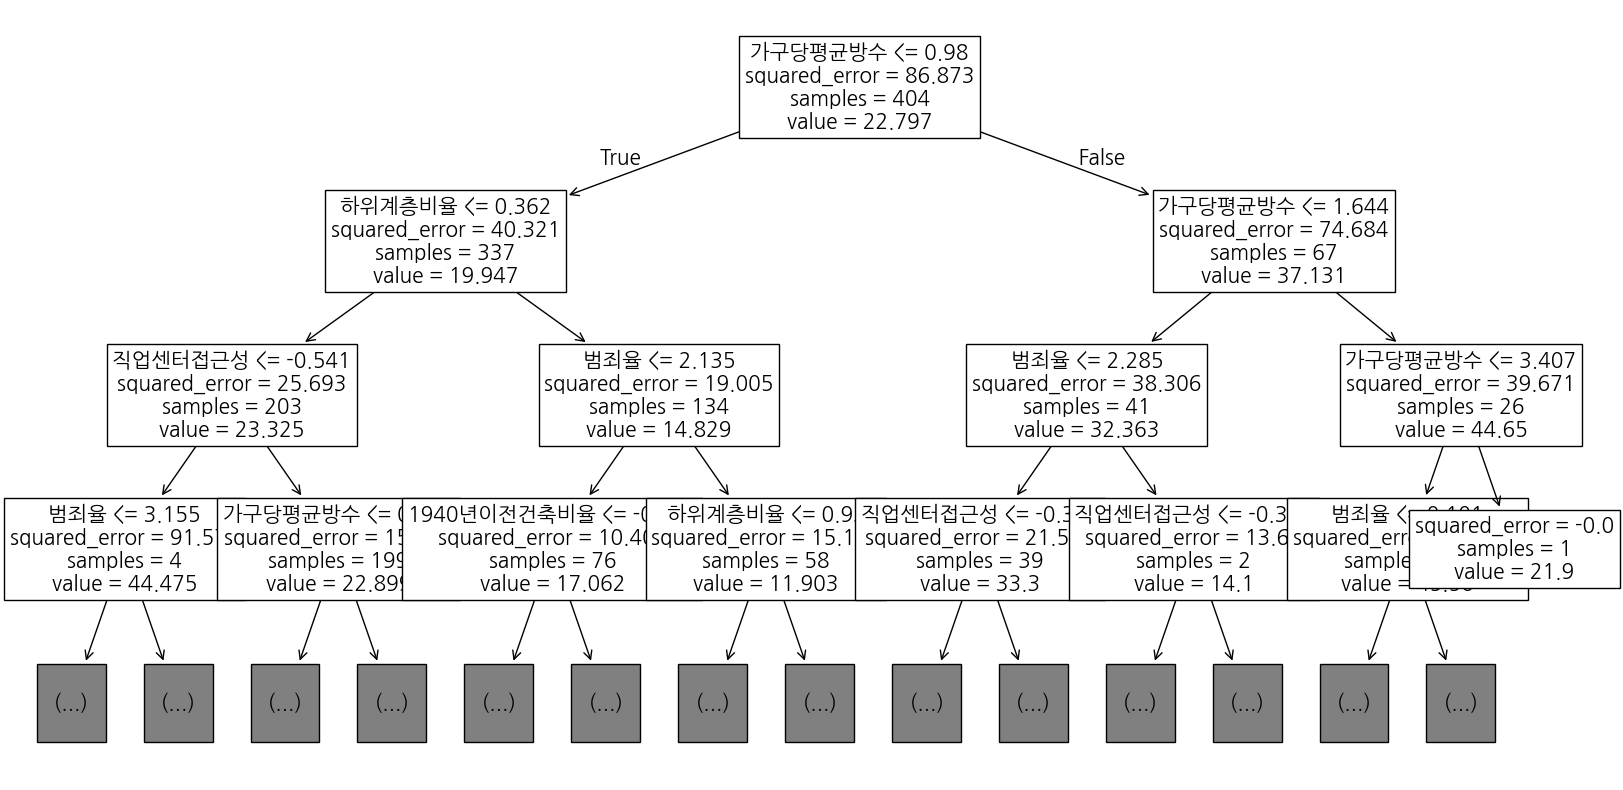

In [96]:
plt.figure(figsize=(20,10))
plot_tree(dtr, max_depth=3, feature_names=dtr.feature_names_in_, fontsize=15)
plt.show()

In [99]:
rfr = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=42)
rfr.fit(X_train_scaled, y_train)
pred = rfr.predict(X_test_scaled)
rfr_result = pd.DataFrame(rfr.feature_importances_, index=rfr.feature_names_in_)
display(rfr_result)
print('MSE :',mean_squared_error(y_test, pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test, pred)))
print('R2 :', r2_score(y_test, pred))

,0
범죄율,0.033387
"25,000평방피트초과",0.000985
비소매상업지역비율,0.003867
찰스강경계,0.000956
농축 일산화질소,0.011643
가구당평균방수,0.527453
1940년이전건축비율,0.007702
직업센터접근성,0.057363
도로접근성,0.002446
재산세율,0.011927


MSE : 8.91414597375121
RMSE : 2.9856567072842135
R2 : 0.8784442096180552
